In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
df = pd.read_csv('datasets/Mall_Customers.csv')
print('Mall Customers\n',df)

Mall Customers
      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [20]:
# separate the input and output variable
#x = df[['Annual Income (k$)', 'Spending Score (1-100)']] #2inputs
x = df.iloc[:,[3,4]] #selecting 3,4 columns

In [21]:
# feature scalling
from sklearn.preprocessing  import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [23]:
x_scaled

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

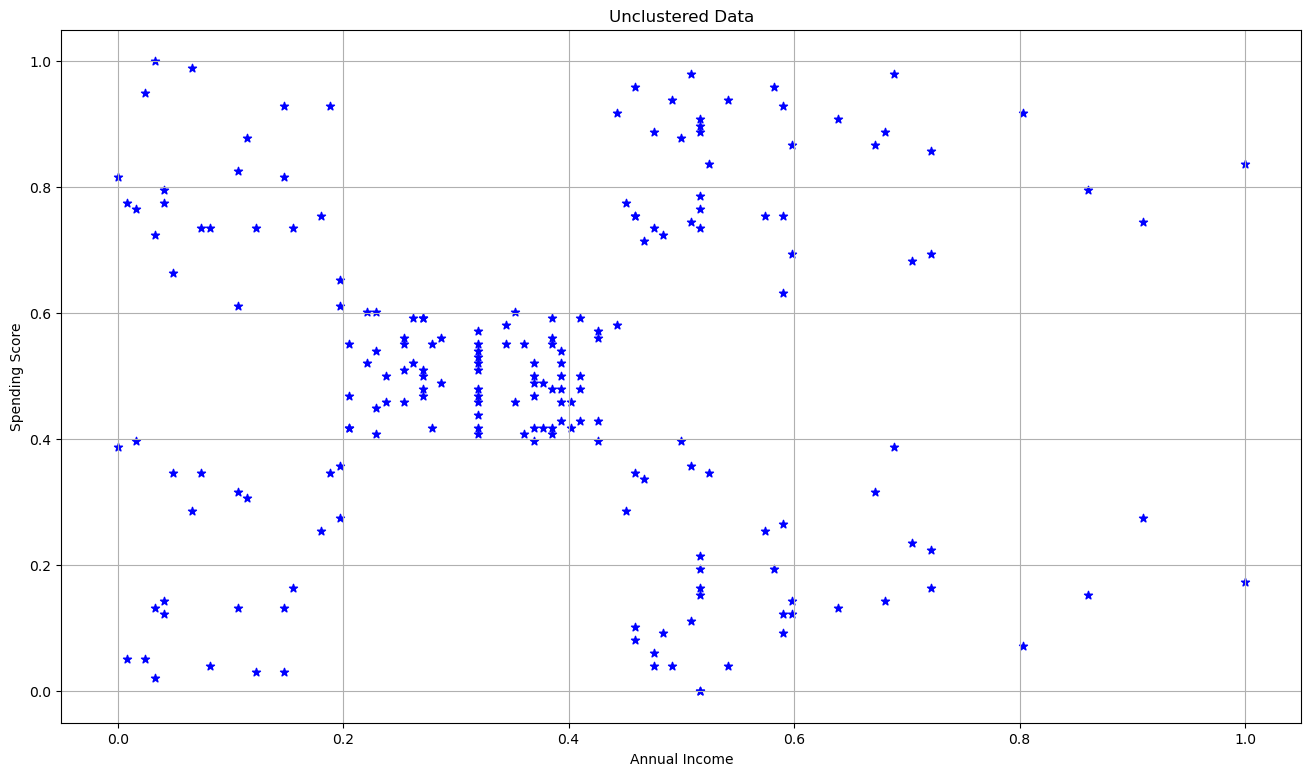

In [24]:
#visualization
plt.figure(figsize=(16,9))
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
#plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'b', marker = '*')
plt.scatter(x_scaled[:,0], x_scaled[:,1], color = 'b', marker = '*')

In [62]:
from sklearn.cluster import KMeans
km=KMeans(random_state=0, n_clusters = 10)
km.fit(x_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, random_state=0)

In [63]:
#sum squared error
km.inertia_

1.6388534026874373

In [64]:
km.labels_

array([8, 4, 2, 4, 8, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 8, 4, 8, 4, 8, 4,
       2, 4, 2, 4, 8, 0, 8, 4, 2, 4, 2, 4, 2, 4, 2, 4, 8, 4, 8, 4, 8, 0,
       8, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 9, 0, 0, 9, 9, 0, 9, 0, 0,
       0, 9, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 3, 6, 9, 1, 3, 6, 3, 6,
       9, 6, 3, 1, 3, 6, 3, 6, 3, 1, 9, 1, 3, 1, 9, 6, 3, 1, 3, 1, 3, 6,
       3, 1, 3, 6, 3, 6, 9, 1, 3, 1, 3, 6, 3, 1, 3, 6, 3, 6, 3, 1, 3, 1,
       3, 6, 3, 1, 5, 1, 5, 1, 5, 1, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7])

In [65]:
sse=[]
for k in range(1,16):
    km=KMeans(random_state=0, n_clusters = k, n_init = 10)
    km.fit(x_scaled)
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [66]:
sse

[23.04072032603991,
 13.993505283127977,
 9.058985215159455,
 6.110312266413657,
 3.5831179059525606,
 3.098385141882586,
 2.648810998219034,
 2.281629082674578,
 1.873875095904132,
 1.6388534026874373,
 1.4597027516286651,
 1.3338510664733565,
 1.179163306686408,
 1.0710050069993988,
 0.959216556496108]

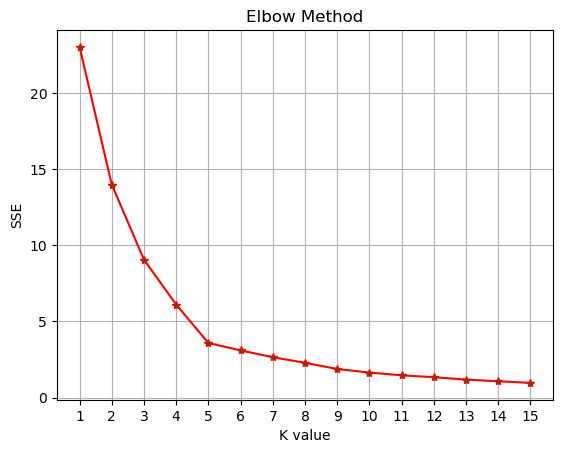

In [67]:
plt.title('Elbow Method')
plt.grid()
plt.xlabel('K value')
plt.ylabel('SSE')
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, color = 'red', marker = '*', mfc = 'green')

In [68]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [69]:
from kneed import KneeLocator

In [70]:
kl = KneeLocator(range(1,16), sse, curve = "convex", direction="decreasing")

In [71]:
kl.elbow

5

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
silh=[]
for k in range(2,16):
    km=KMeans(random_state=0, n_clusters = k, n_init = 10)
    km.fit(x_scaled)
    score = silhouette_score(x_scaled, km.labels_)
    silh.append(score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [74]:
silh

[0.33340205479521,
 0.4514909309424474,
 0.49620078745146784,
 0.5594854531227246,
 0.5377658512956012,
 0.5258817307975516,
 0.4977276708141946,
 0.44293867395812975,
 0.44607278944436446,
 0.43900741691806294,
 0.4343195557939575,
 0.4344544224397771,
 0.42798872716414516,
 0.4381650583803275]

<BarContainer object of 14 artists>

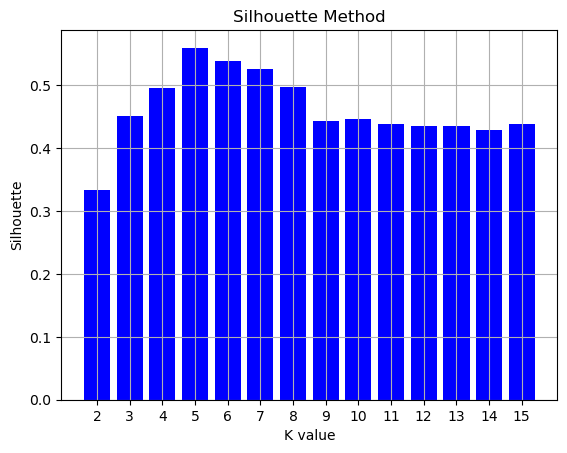

In [75]:
plt.title('Silhouette Method')
plt.grid()
plt.xlabel('K value')
plt.ylabel('Silhouette')
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color = 'blue')

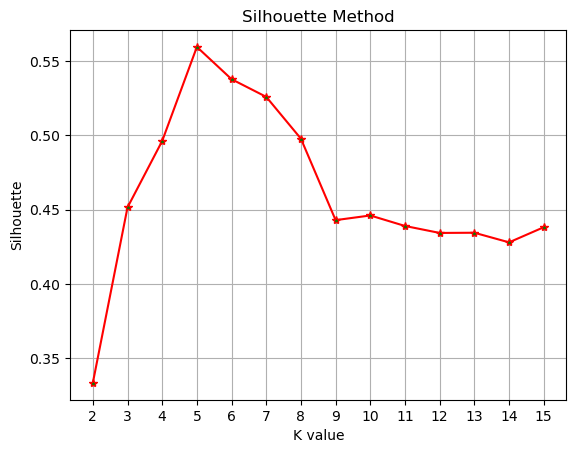

In [76]:
plt.title('Silhouette Method')
plt.grid()
plt.xlabel('K value')
plt.ylabel('Silhouette')
plt.xticks(range(2,16))
plt.plot(range(2,16), silh, color = 'red', marker = '*', mfc = 'green')

In [131]:
# create the cluster
km=KMeans(random_state=0, n_clusters = 5, n_init = 10)

In [132]:
y = km.fit_predict(x_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [133]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [134]:
km.inertia_

3.5831179059525606

In [135]:
cents = km.cluster_centers_
cents

array([[0.6       , 0.16443149],
       [0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

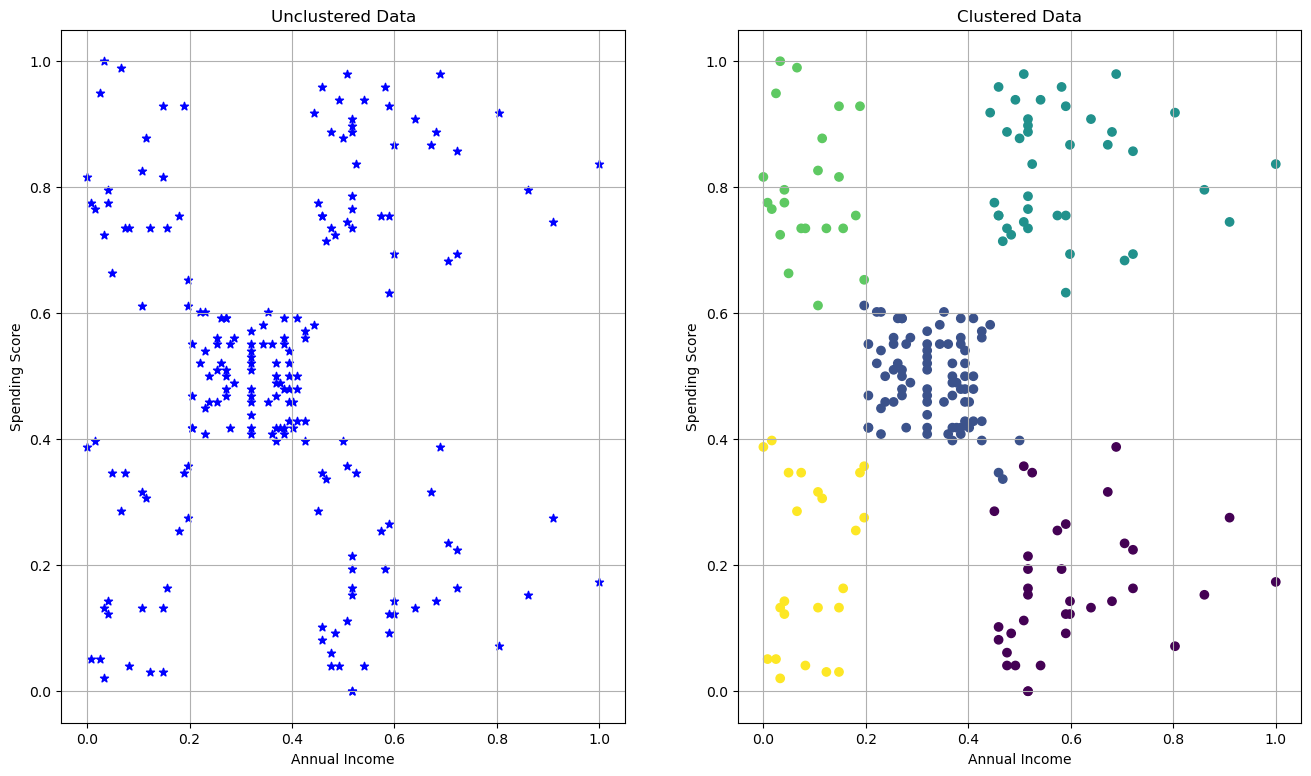

In [136]:
#visualization
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
#plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'b', marker = '*')
plt.scatter(x_scaled[:,0], x_scaled[:,1], color = 'b', marker = '*')

plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
#plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'b', marker = '*')
plt.scatter(x_scaled[:,0], x_scaled[:,1], marker = 'o', c=y)

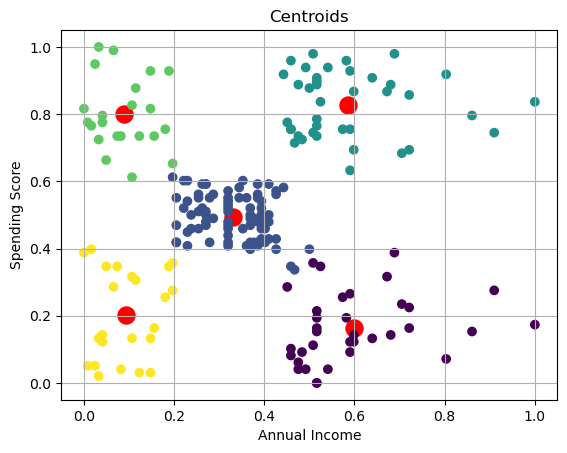

In [137]:
#plt.figure(figsize=(16,9))
plt.title('Centroids')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(cents[:,0], cents[:,1], color = 'red', marker = 'o', s =150 )
plt.scatter(x_scaled[:,0], x_scaled[:,1], marker = 'o', c=y)

In [138]:
# filter the clusters 

In [139]:
clt1 = df[y==0]
clt2 = df[y==1]
clt3 = df[y==2]
clt4 = df[y==3]
clt5 = df[y==4]

In [140]:
clt1.shape,clt2.shape,clt3.shape,clt4.shape,clt5.shape

((35, 6), (81, 6), (39, 6), (22, 6), (23, 6))

In [141]:
clt1.to_csv('cluster_1', index=False)

In [142]:
df['label']=y

In [143]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


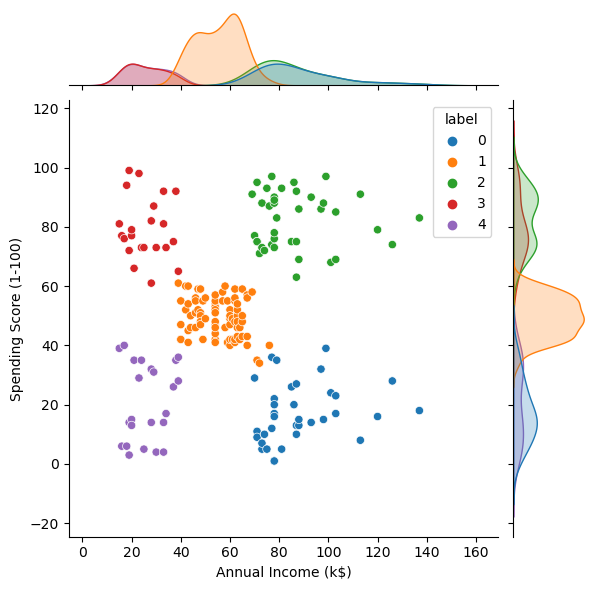

In [144]:
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)', data = df, hue = 'label', palette = 'tab10')

In [145]:
# predict
new = pd.DataFrame(data=[[56,78],[121,79],[93,56],[45,41],[76,66],[23,30]],columns = x.columns)
new

,Annual Income (k$),Spending Score (1-100)
0,56,78
1,121,79
2,93,56
3,45,41
4,76,66
5,23,30


In [148]:
y = km.fit_predict(new)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [149]:
y

array([3, 2, 0, 4, 0, 1])